<a href="https://colab.research.google.com/github/stelmic/test-actresses/blob/master/actresses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
folder = 'cococ'
file = 'coco_chanel.txt'

In [0]:
folder = 'audreyh'
file = 'audrey_hepburn.txt'

In [0]:
folder = 'gracek'
file = 'grace_kelly.txt'

In [0]:
path = Path('/content/data/face')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/data/face/gracek'),
 PosixPath('/content/data/face/grace_kelly.txt'),
 PosixPath('/content/data/face/coco_chanel.txt'),
 PosixPath('/content/data/face/audrey_hepburn.txt'),
 PosixPath('/content/data/face/cococ'),
 PosixPath('/content/data/face/audreyh')]

In [0]:
# !cd /content/data/face/cococ
# !rm /content/data/face/cococ/*

In [0]:
classes = ['cococ','audreyh','gracek']

In [0]:
path = Path('/content/data/face')
download_images(path/file, dest, max_pics=350)

Error http://www.secondcitystyle.com/images/photos/uncategorized/2007/10/16/grace_kelly_portrait_2.jpg HTTPConnectionPool(host='www.secondcitystyle.com', port=80): Max retries exceeded with url: /images/photos/uncategorized/2007/10/16/grace_kelly_portrait_2.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fb8f4b53ba8>, 'Connection to www.secondcitystyle.com timed out. (connect timeout=4)'))


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cococ


audreyh


gracek


cannot identify image file <_io.BufferedReader name='/content/data/face/gracek/00000302.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:885: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/content/data/face/gracek/00000244.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/face/gracek/00000117.jpg'>


In [0]:
??verify_images()

In [0]:
path = Path('/content/data/face')

In [0]:
path.ls()

[PosixPath('/content/data/face/gracek'),
 PosixPath('/content/data/face/grace_kelly.txt'),
 PosixPath('/content/data/face/coco_chanel.txt'),
 PosixPath('/content/data/face/audrey_hepburn.txt'),
 PosixPath('/content/data/face/cococ'),
 PosixPath('/content/data/face/audreyh')]

In [0]:
classes = ['cococ','audreyh','gracek']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cococ


audreyh


gracek


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['audreyh', 'cococ', 'gracek']

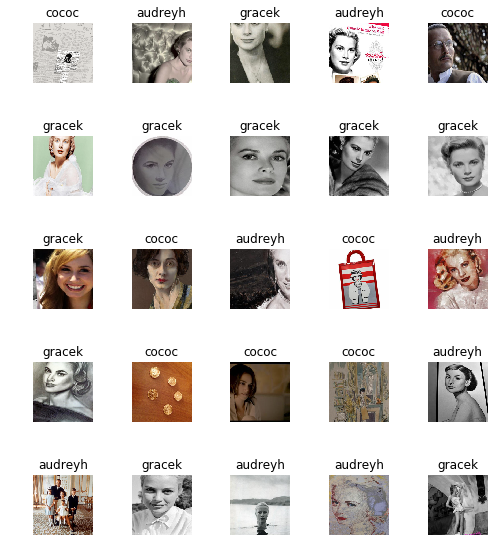

In [0]:
data.show_batch(rows=5, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['audreyh', 'cococ', 'gracek'], 3, 852, 212)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 70321264.16it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.358495,1.007861,0.542453,05:45
1,1.230987,1.105850,0.570755,05:45


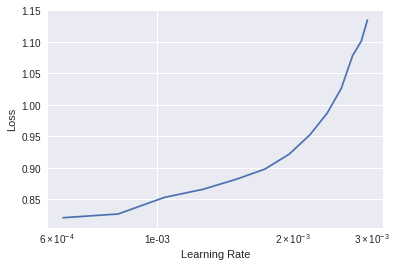

In [0]:
learn.recorder.plot()

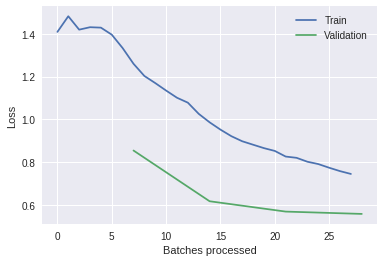

In [0]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

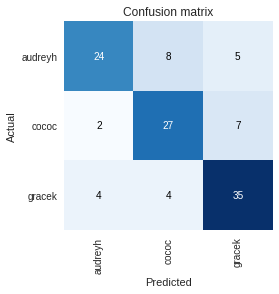

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=2)

[('audreyh', 'cococ', 8),
 ('cococ', 'gracek', 7),
 ('audreyh', 'gracek', 5),
 ('gracek', 'audreyh', 4),
 ('gracek', 'cococ', 4),
 ('cococ', 'audreyh', 2)]

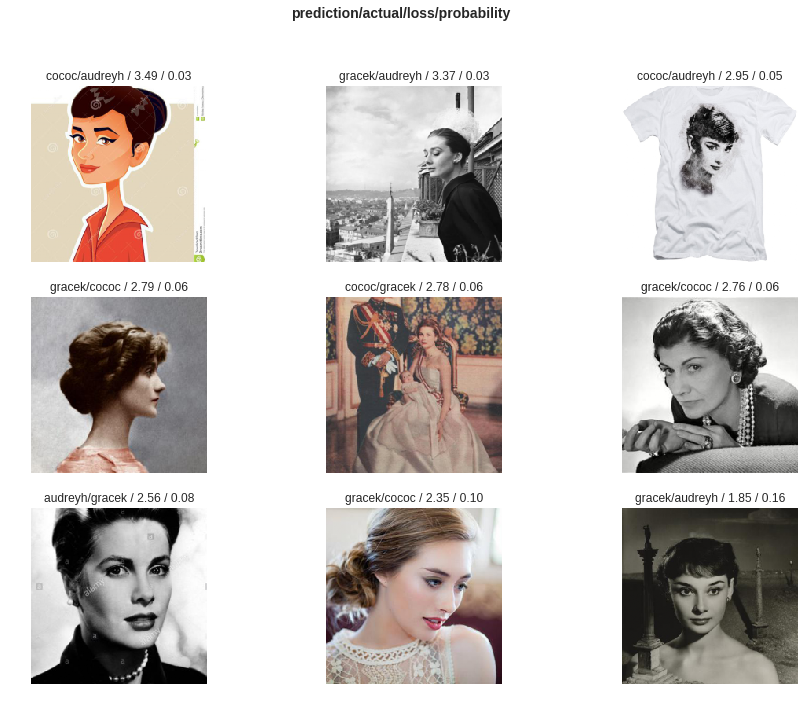

In [0]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.441711,0.570662,0.215517,04:17


In [0]:
data.classes

['audreyh', 'cococ', 'gracek']

In [0]:
learn.export()

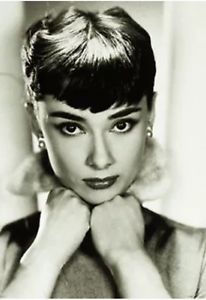

In [0]:
img = open_image(path/'audreyh'/'00000021.jpg')
img

In [0]:
classes = ['audreyh', 'cococ', 'gracek']

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


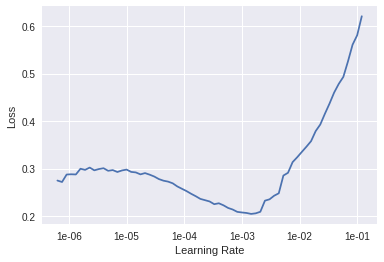

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.338211,0.475153,0.189655,04:18
1,0.252606,0.436444,0.181034,04:19


In [0]:
learn.save('/content/data/face/models/stage-2')

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.165451,0.409642,0.172414,04:19
1,0.141495,0.346805,0.137931,04:19
2,0.132891,0.337997,0.120690,04:18
3,0.127575,0.340246,0.120690,04:20
4,0.112124,0.342657,0.120690,04:20


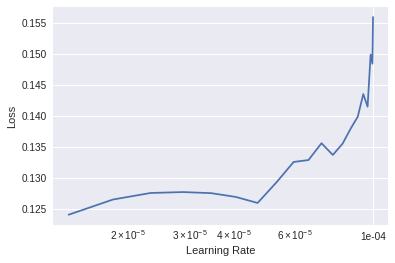

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.047917,0.333077,0.112069,04:19
1,0.053528,0.353052,0.120690,04:18
2,0.052164,0.296223,0.103448,04:19
3,0.048944,0.402550,0.120690,04:20
4,0.045753,0.367831,0.129310,04:24
5,0.049535,0.411034,0.146552,04:20
6,0.056403,0.397704,0.129310,04:18
7,0.053390,0.323286,0.103448,04:18
8,0.047489,0.309067,0.103448,04:18
9,0.043534,0.309512,0.103448,04:19


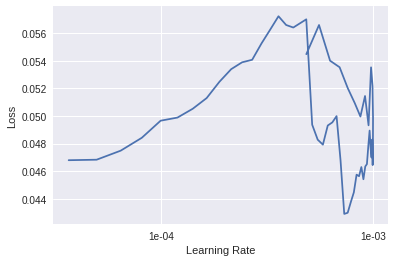

In [0]:
learn.recorder.plot()